
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> **08. AUTOENCODERS** </center>

_Teaching machines to learn for themselves without having to be explicitly told if everything they do is right or wrong — is the key to “true”.  [Yan Lecun, director of AI research]_

## <span style="color:red"> Outline </span> 
1. [**Autoencoders: an unsupervised perspective**](#AE)
2. [**Autoecoders from DNN**](#AE_DNN)
3. [**Autoecoders from CNN**](#AE_CNN)



In [ ]:
#@title **Student:** Mount the Drive  (If you are in colab)
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/course-IA2


In [ ]:
#@title **Load libraries**
#@markdown Here is important to change to GPU  

import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
print(tf.__version__)

2.12.0


# **1. Autoencoders: an unsupervised perspective** <a name="AE"></a>




---


The **autoencoders** learn a data representation from the **(encoder)** using **unlabeled data**  for some **(decoder)** application, such as data reduction, abnormal detection, noise reduction, and data generation,  among many others. 

<center> 
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/autoencoders.png" style="width:700px;heigth:100px">
</center>

Three main components are identified in autoencoders: 

- **Encoder:** $(f(\mathbf{x}))$ works as a classical DNN algorithm that emulate a encoding function to obtain a latten vector. 
- **Latten vector - bottleneck - embedding:** $(\mathbf{h} = f(\mathbf{x}))$ is a hidden layer that describe in special coding the input, as $\mathbf{h} = \sigma(\mathbf{Wx}+ \mathbf{b})$ 
- **Decoder:**, $(r = g(\mathbf{h}))$,   a decoding function to obtain an approximation of $\mathbf{{x}'}$, as $\mathbf{{x}'} = \sigma'(\mathbf{W'h}+ \mathbf{b'})$
- **Loss function:** a distance between compressed and decompressed representation, defined as 
$$\left \| \mathbf{x} -\mathbf{{x}'} \right \|^{2} = \left \| \mathbf{x} - \sigma'(\mathbf{W'(\sigma(\mathbf{Wx}+ \mathbf{b}))}+ \mathbf{b'}) \right \|^{2} $$

Nowadays, these algorithms are developed with deep learning representations, and among the most know applications, we can enumerate: 

1. Reduce dimensionality (Like or better than a PCA)
2. To establish hidden vectors (embeddings) to represent complex knowledge in a latent space. 
3. To detect anomalies and reduce noise. It allows us to work with strongly non-balanced data. 
4. Data visualization


**Go to the action!**



---



In [ ]:
#@title **Coding** Time to prepare data:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Let's do a flatten to put into a DNN autoencoder
x_train_flatten = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test_flatten = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train_flatten[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(784,)


In [ ]:
#@title **Coding** The most simple autoencoder!

encoding_dimension = 32
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dimension, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title **Coding** Train and test as usual, BUT there is something different!
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=70,
                batch_size=256, shuffle=True,
                validation_data=(x_test_flatten, x_test_flatten))

235/235 [==============================] - 2s 7ms/step - loss: 0.1122 - val_loss: 0.1110
Epoch 44/70
235/235 [==============================] - 1s 6ms/step - loss: 0.1122 - val_loss: 0.1107
Epoch 45/70
235/235 [==============================] - 1s 6ms/step - loss: 0.1122 - val_loss: 0.1109
Epoch 46/70
235/235 [==============================] - 1s 5ms/step - loss: 0.1122 - val_loss: 0.1109
Epoch 47/70
235/235 [==============================] - 1s 6ms/step - loss: 0.1121 - val_loss: 0.1111
Epoch 48/70
235/235 [==============================] - 1s 6ms/step - loss: 0.1121 - val_loss: 0.1107
Epoch 49/70
235/235 [==============================] - 1s 5ms/step - loss: 0.1122 - val_loss: 0.1109
Epoch 50/70
235/235 [==============================] - 2s 10ms/step - loss: 0.1121 - val_loss: 0.1107
Epoch 51/70
235/235 [==============================] - 2s 7ms/step - loss: 0.1121 - val_loss: 0.1111
Epoch 52/70
235/235 [==============================] - 1s 5ms/step - loss: 0.1121 - val_loss: 0.1106
E

In [ ]:
#@title **Coding** What about if we take only the encoded part to return the latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

#Decoder
encoded_input = tf.keras.layers.Input(shape=(encoding_dimension,))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

print("\n encoder model: encoder \n")
print(encoder.summary())
print(" \n decoder model: decoder \n")
print(decoder.summary())


 encoder model: encoder 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None
 
 decoder model: decoder 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                            

In [ ]:
#@title **Coding** Let's predict the test images and also the latent vectors 
encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)
predicted.shape

313/313 [==============================] - 1s 2ms/step


(10000, 784)

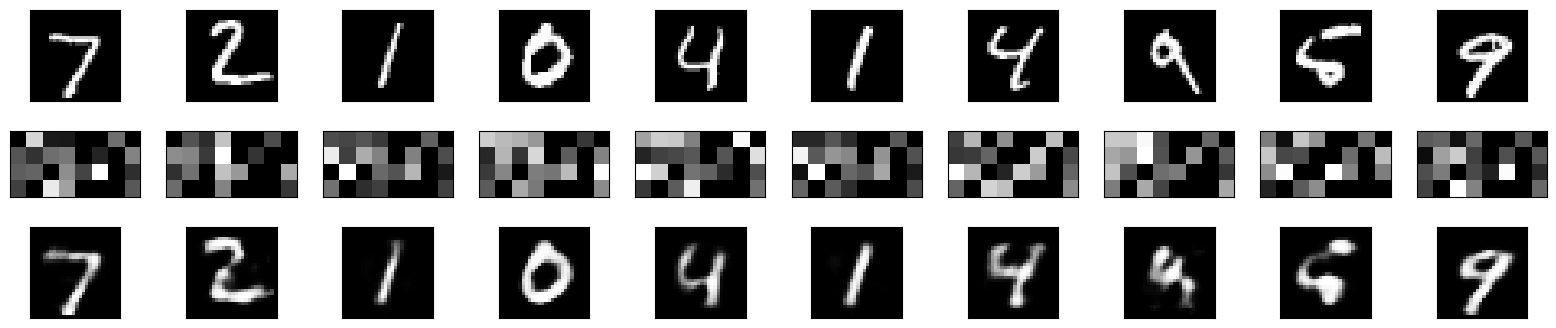

In [ ]:
#@title **Coding** Since we already have the predicted values, let's visualize the results

plt.figure(figsize=(40, 4))
for i in range(10):
    # Display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(4,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/1 [==============================] - 0s 20ms/step


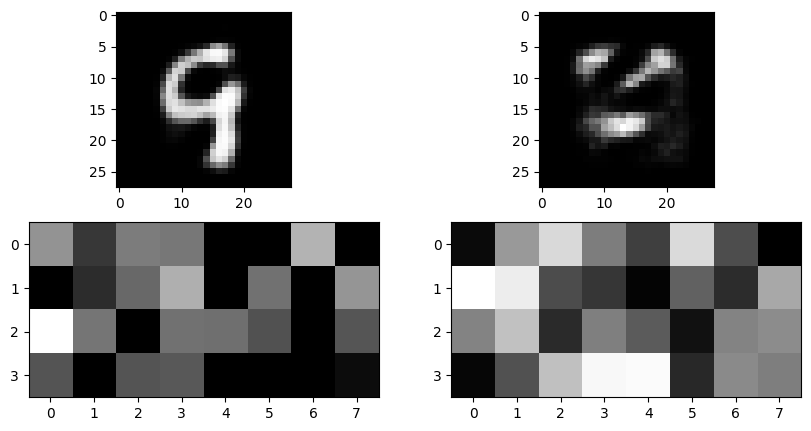

In [ ]:
#@title **Coding** evaluating random embedding vectors as latent space

index_image =  150#@param {type:"integer"}
random_index =  4#@param {type:"number"}


exp_orig = np.expand_dims(encoded_imgs[index_image], axis=0)

random_h = (np.random.random(encoded_imgs[index_image].shape))*random_index
exp_rand = np.expand_dims(random_h, axis=0)

decod_img = decoder.predict(exp_orig)
decod_rnd = decoder.predict(exp_rand)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2, 2, 1)
ax.imshow(decod_img.reshape(28,28), cmap="gray")
ax = fig.add_subplot(2, 2, 2)
ax.imshow(decod_rnd.reshape(28,28), cmap="gray")
ax = fig.add_subplot(2, 2, 3)
ax.imshow(encoded_imgs[index_image].reshape(4,8), cmap="gray")
ax = fig.add_subplot(2, 2, 4)
ax.imshow(random_h.reshape(4,8), cmap="gray")



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Test with [`fashion_mnist`](https://https://keras.io/api/datasets/fashion_mnist/) dataset
- Change the optimizer and evaluate performance
- Now, build a larger DNN with additional hidden layers and report the results. 

In [ ]:
#@title **Student solution:** Test it with the fashion_mnist


# Load the data
""" 
Put your code here 
"""   

# Normalizing
""" 
Put your code here 
"""   

# Let's do a flatten to put into a DNN autoencoder
""" 
Put your code here 
"""   

# Optimizator and fit the data
""" 
Put your code here 
"""   

In [ ]:
#@title **Student solution** predict and visualize over fashion
""" 
Put your code here 
"""   

# Visualize the results
""" 
Put your code here 
"""   

In [ ]:
#@title **Student solution** evaluating random embedding vectors as latent space
""" 
Put your code here 
"""   

In [ ]:
#@markdown ## **1.1 Let's build a larger Autoencoder by using a DNN**
#@markdown **Student solution** 

""" 
Put your code here 
"""   

In [ ]:
#@title **Coding** Train and test as usual
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=100,
                batch_size=256, shuffle=True,
                validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/100
235/235 [==============================] - 5s 9ms/step - loss: 0.3775 - val_loss: 0.3263
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3148 - val_loss: 0.3139
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.3064 - val_loss: 0.3070
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.3017 - val_loss: 0.3015
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2985 - val_loss: 0.2992
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2962 - val_loss: 0.2990
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2944 - val_loss: 0.2961
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2930 - val_loss: 0.2953
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2916 - val_loss: 0.2939
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2907 - va

In [ ]:
#@title **Coding** Take only the encoded part to return latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)
predicted.shape

313/313 [==============================] - 1s 2ms/step


(10000, 784)

313/313 [==============================] - 1s 2ms/step


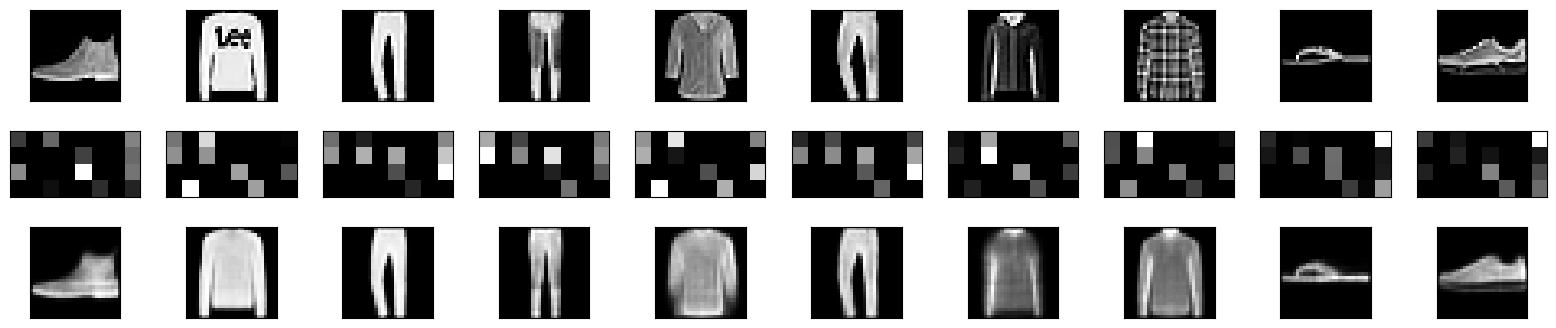

In [ ]:
#@title **Coding** predict and visualize over fashion

encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)


# Visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(4,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### **2.2 Anomaly detection Autoencoders from DNN**  <a name="AE_DNN"></a>


One of the main tasks solved for autoencoders is **anomaly detection** which consists on detect **NON-COMMON PATTERNS** from a know distribution of data representation. 

To prove the effectiveness of autoencoders we will try to solve the problem of detecting **FRAUD bank transactions** over a European credit card transaction dataset. The dataset has **284807 normal transactions** and **492 fraudulent transactions** taken from two consecutive days. 

The dataset is available in Kaggle and for confidential concerns, the features were previously mapped to a endoded representation used principal component analysis (PCA). 

**The idea:** is to detect fraud transactions. 

**Go to the action!**



In [ ]:
#@title **Coding** Load and explore data
import pandas as pd
datos = pd.read_csv("https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/data/creditcard.csv")


datos

Strongly unbalanced dataset!


Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [ ]:
#@title **Coding** How many values of each class do we have?
nr_classes = datos['Class'].value_counts(sort=True)
print("Strongly unbalanced dataset!")
print(nr_classes)

Strongly unbalanced dataset!
0    284315
1       492
Name: Class, dtype: int64


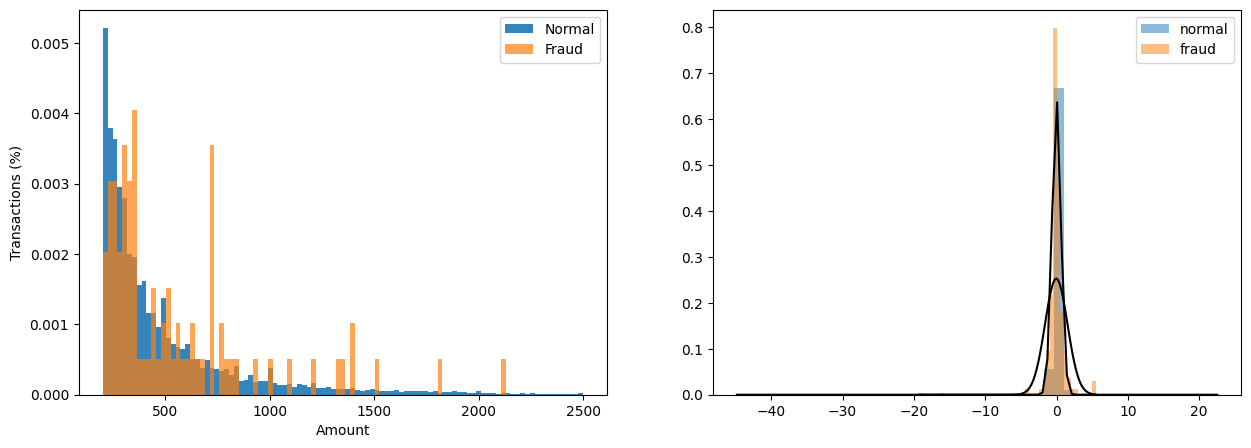

In [ ]:
#@title **Coding** It is a really complex problem!
#@markdown **Transaction distribution and feature distribution among classes**
#@markdown Features among V1-V28

feature = "V23" #@param {type:"string"}

import scipy.stats as stats

normal_v = datos[feature][datos.Class == 0]
fraud_v  = datos[feature][datos.Class == 1]
d_normal = stats.norm(loc=np.mean(normal_v), scale=np.std(normal_v))
d_fraud = stats.norm(loc=np.mean(fraud_v), scale=np.std(fraud_v))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)

bins = np.linspace(200, 2500, 100)
ax = plt.hist(datos[datos.Class == 0].Amount, bins, density=True, alpha=0.9,  label='Normal')
ax = plt.hist(datos[datos.Class == 1].Amount, bins, density=True,alpha=0.7,  label='Fraud')
ax = plt.legend(loc='upper right')
ax = plt.xlabel("Amount")
ax = plt.ylabel("Transactions (%)");

ax = fig.add_subplot(1, 2, 2)
ax = plt.hist(normal_v, bins=50, density=True, alpha=.5, label="normal");
ax = plt.hist(fraud_v, bins=50, density=True, alpha=.5, label="fraud");
t_normal = np.linspace(np.min(normal_v), np.max(normal_v), 100)
t_fraud = np.linspace(np.min(fraud_v), np.max(fraud_v), 100)
ax = plt.plot(t_normal, d_normal.pdf(t_normal), c='black')
ax = plt.plot(t_fraud, d_fraud.pdf(t_fraud), c='black')
ax = plt.legend(loc='upper right')

In [ ]:
#@title **Coding** We should prepare the dataset
#@markdown **we remove non-important columns**
#@markdown and normalize "amount" to be in same range as PCA features

from sklearn.preprocessing import StandardScaler
datos.drop(['Time'], axis=1, inplace=True)
datos['Amount'] = StandardScaler().fit_transform(datos['Amount'].values.reshape(-1,1))

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(datos, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
X_train = X_train.values

Y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_test = X_test.values
print(X_train.shape, X_test.shape, Y_test.shape)

(227451, 29) (56962, 29) (56962,)


In [ ]:
#@title **Coding** Only train normal transactions! 

#@markdown **The autoencoder learn only conventional things and will generate alarms for abnormal transactions**
#@markdown Now, we train the abnormal detection autoencoder

dim_entrada = X_train.shape[1]         
input_layer = tf.keras.layers.Input(shape=(dim_entrada,))

encoder = tf.keras.layers.Dense(20, activation='tanh')(input_layer)
encoder = tf.keras.layers.Dense(14, activation='relu')(encoder)

decoder = tf.keras.layers.Dense(20, activation='tanh')(encoder)
decoder = tf.keras.layers.Dense(29, activation='relu')(decoder)


autoencoder_ad = tf.keras.models.Model(inputs=input_layer, outputs=decoder)

from keras.optimizers import SGD
sgd = tf.optimizers.SGD(lr=0.01)
autoencoder_ad.compile(optimizer=sgd, loss='mse')

autoencoder_ad.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test,X_test), verbose=1)



Epoch 1/10
7108/7108 [==============================] - 40s 6ms/step - loss: 0.9330 - val_loss: 0.8991
Epoch 2/10
7108/7108 [==============================] - 27s 4ms/step - loss: 0.8422 - val_loss: 0.8465
Epoch 3/10
7108/7108 [==============================] - 27s 4ms/step - loss: 0.7998 - val_loss: 0.8127
Epoch 4/10
7108/7108 [==============================] - 27s 4ms/step - loss: 0.7727 - val_loss: 0.7925
Epoch 5/10
7108/7108 [==============================] - 26s 4ms/step - loss: 0.7554 - val_loss: 0.7779
Epoch 6/10
7108/7108 [==============================] - 24s 3ms/step - loss: 0.7416 - val_loss: 0.7653
Epoch 7/10
7108/7108 [==============================] - 25s 4ms/step - loss: 0.7296 - val_loss: 0.7546
Epoch 8/10
7108/7108 [==============================] - 25s 3ms/step - loss: 0.7197 - val_loss: 0.7461
Epoch 9/10
7108/7108 [==============================] - 27s 4ms/step - loss: 0.7119 - val_loss: 0.7396
Epoch 10/10
7108/7108 [==============================] - 25s 4ms/step - l

In [ ]:
#@title **Coding** Save and load your model according to your work

#autoencoder_ad.save('models/mymodel.h5')
autoencoder_ad = tf.keras.models.load_model('models/autoendoder_ad_100.h5')
autoencoder_ad.summary()


#Decoder
encoded_input = tf.keras.layers.Input(shape=(14,))
decoder_layer = autoencoder_ad.layers[-2]
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

print(" \n decoder model: decoder \n")
print(decoder.summary())

Model: "functional_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 20)                600       
                                                                 
 dense_1 (Dense)             (None, 14)                294       
                                                                 
 dense_2 (Dense)             (None, 20)                300       
                                                                 
 dense_3 (Dense)             (None, 29)                609       
                                                                 
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________
 
 decoder model: decoder 

Model: "model_7"
_______

### **Precision vs Recall**

Since we have **unbalanced data** and we focus on detect **fraud** transaction, we need to categorize fraud and normal transactions, as: 

- **_TP_**: fraud detected as fraud
- **_TN_**: normal detected as normal
- **_FN_**: fraud detected as normal
- **_FP_**: normal detected as fraud

Then, metrics that five more information are: 

- **Precision:** ($\frac{TP}{TP+ FP}$)  proportion of correct fraud detections w.r.t all fraud detections. In other terms, this measure estimates the probability that a randomly sample will be relevant (TP)


- **Recall:** ($\frac{TP}{TP+ FN}$)  the proportion of correct fraud detections with respect to all fraud samples. In other terms, this measure the estimated probability that a random sample will be properly selected. 

[from wiki]

<center>
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Precisionrecall.png" style="width:700px;heigth:100px"></center>

Now, to apply in our problem we need: 

1. Predict values
2. compute error with real values
3. A threshold with respect to reconstruction
4. Define if it is a fraud. 

In [ ]:
#@title **Coding** predict fraud and normal transactions for test
X_pred = autoencoder_ad.predict(X_test)
ecm = np.mean(np.power(X_test-X_pred,2), axis=1)
print(X_pred.shape)
print(X_pred)

1781/1781 [==============================] - 3s 2ms/step
(56962, 29)
[[0.         5.0236354  0.         ... 0.         0.         0.        ]
 [0.7226257  0.         0.         ... 0.         0.         1.6156082 ]
 [1.4616494  0.         0.23067936 ... 0.         0.         0.        ]
 ...
 [0.         0.16138653 0.         ... 0.         0.         0.        ]
 [0.         0.9776302  1.6521758  ... 0.         0.         0.        ]
 [0.         0.25375032 0.         ... 0.03892219 0.         3.3816788 ]]


If we pass a fraud transaction the reconstruction will be bad or almost worse than a reconstruction from a conventional transaction. 

(56265,)
[2.72213582e-02 2.73992602e-02 2.74341222e-02 ... 1.56669087e+02
 2.00239103e+02 2.63869765e+02]


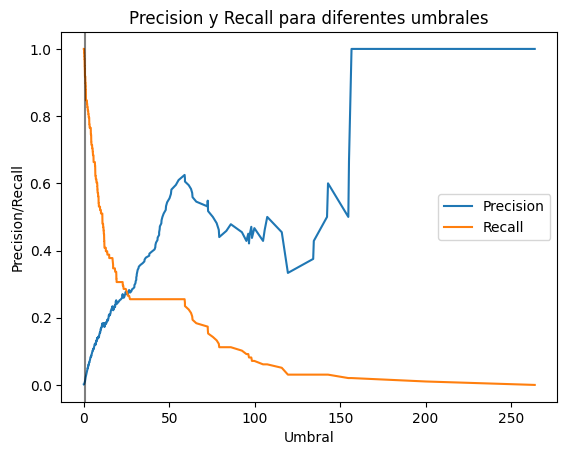

[[52475  4389]
 [   10    88]]
88
Precision:  0.019656019656019656
Recall:  0.8979591836734694


In [ ]:
#@title **Coding** We can plot the precision and recall to decide the threshold}


threshold_pr = 0.98 #@param {type:"slider", min:0, max:250, step:0.01}


from sklearn.metrics import confusion_matrix, precision_recall_curve
precision, recall, umbral = precision_recall_curve(Y_test, ecm)

print(umbral.shape)
print(umbral)
plt.plot(umbral, precision[1:], label="Precision")
plt.plot(umbral, recall[1:], label="Recall")
plt.axvline(threshold_pr, color="black", alpha=0.5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()


threshold_fix = threshold_pr
Y_pred = [1 if e > threshold_fix else 0 for e in ecm]

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

print(conf_matrix[1][1])

Prec =  conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])
Rec = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])

print("Precision: ", Prec)
print("Recall: ", Rec)

0.9103875124895203


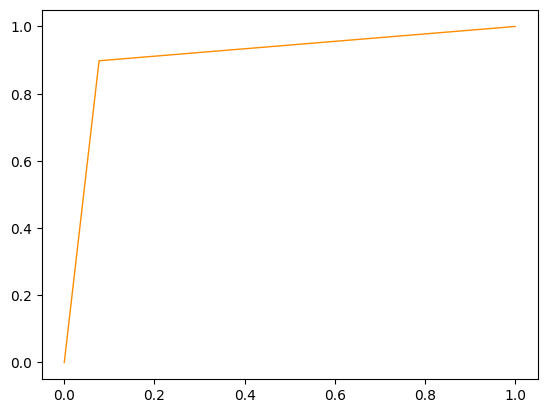

In [ ]:
#@title **Coding** the AUC roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, color='darkorange',lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Change the optimizer and architecture. Is it better with some other configuration?

- Evaluate the performance with a model saved in course with 100 epochs. 

-  Create a decoder model and pass random latent vectors. How robust is the proposed approach?


# **3. Autoencoders from CNN** <a name="AE_CNN"></a>


We can take advantage of convolutions to obtain more robust representation of image data. In this case, we use as usual `Conv2D`, and `MaxPooling2D`. We can also use dropout and other tricks to obtain a representation. 

- Regarding decoder, we use the `UpSampling2D` layer that is. 

In [ ]:
#@title **Coding** To preare data for CNN
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train_d = np.expand_dims(x_train, axis=3)
x_test_d = np.expand_dims(x_test, axis=3)
print("One sample: ", x_train_d[0].shape)
print(x_train_d.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
One sample:  (28, 28, 1)
(60000, 28, 28, 1)


In [ ]:
#@title **Coding** Autoencoder CNN implementation

input_img = tf.keras.layers.Input(shape=(28, 28, 1) ) 
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x) #  (4, 4, 8)  128-dimensional

#@markdown In this case, we have a 128 dimensional de hidden embedding vector

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

autoencoder_cnn.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [ ]:
#@title **Coding** Train and test as usual
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit(x_train_d, x_train_d, epochs=100,
                batch_size=256, shuffle=True,
                validation_data=(x_test_d, x_test_d))

Epoch 1/100
235/235 [==============================] - 12s 12ms/step - loss: 0.1938 - val_loss: 0.1448
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1359 - val_loss: 0.1257
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1241 - val_loss: 0.1209
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1193 - val_loss: 0.1173
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1162 - val_loss: 0.1147
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1138 - val_loss: 0.1111
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1121 - val_loss: 0.1099
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1099 - val_loss: 0.1086
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1091 - val_loss: 0.1061
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1082 - val_

In [ ]:
#@title **Coding** We only take the encoded part to return latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test_d)
predicted = autoencoder_cnn.predict(x_test_d)
predicted.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

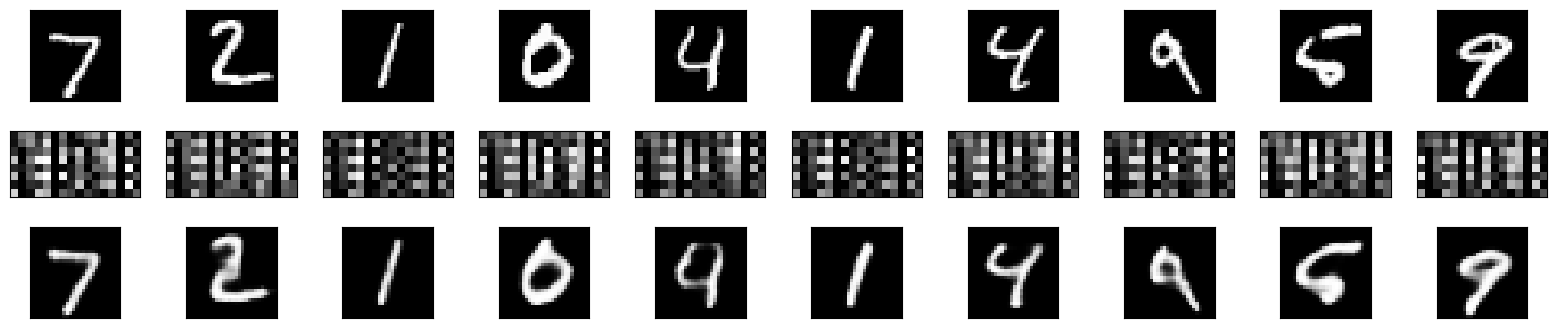

In [ ]:
#@title **Coding** Visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,16))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

-  Try a CNN autoencoder for `cifar-10`
-  Ilustrate the obtained results



In [ ]:
#@title **Student solution** CIFAR 10

# Load the data
""" 
Put your code here 
"""   

# Normalizing
""" 
Put your code here 
"""   

# Let's do a flatten to put into a DNN autoencoder
""" 
Put your code here 
"""   



In [ ]:
#@title ****Student solution**** train and test as usual. Optimizator and fit the data
""" 
Put your code here 
"""   

In [ ]:
#@title **Student solution** take only the encoded part to return latent vectors
""" 
Put your code here 
"""   

313/313 [==============================] - 1s 2ms/step


(10000, 32, 32, 3)

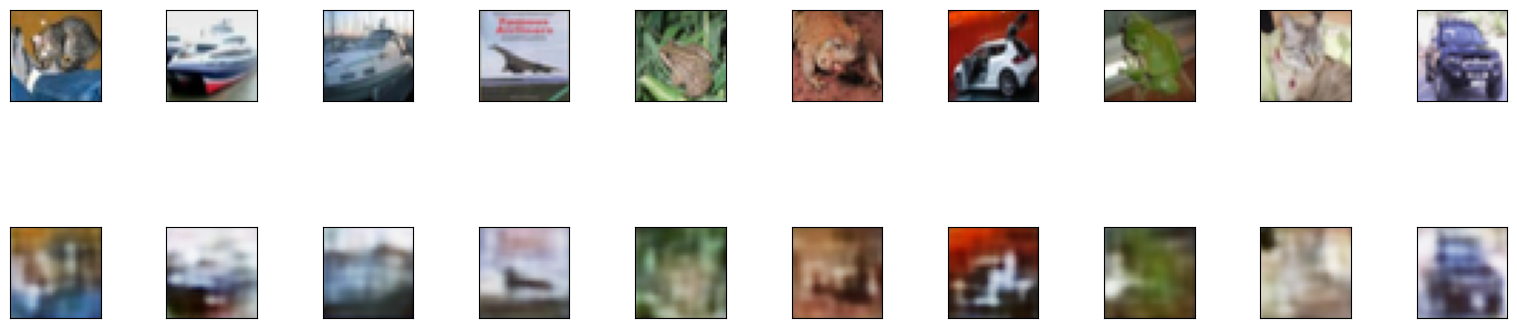

In [ ]:
#@title **Student solution** predict and visualize over cifar
""" 
Put your code here 
"""   

#### **3.1 Noise reduction**

From convolutional autoencoders arise novel applications such as noise reduction, coloring images, and many others. In such a case, we need to form pair of images during training. 
- In the input of the autoencoder is presented the **raw image** (noisy, gray, high-resolution, other semantic concepts)
- In the output of the autoencoder is presented **the expected image**. 



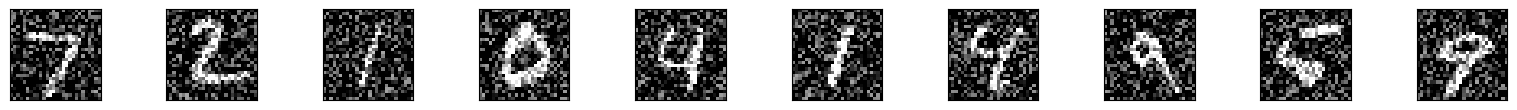

In [ ]:
#@title **Coding** Create a noisy dataset 
noise_factor =  1.3#@param {type:"number"}

x_train_noisy = x_train_d + (np.random.random(x_train_d.shape)-0.5)*noise_factor
x_test_noisy = x_test_d + (np.random.random(x_test_d.shape)-0.5)*noise_factor

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#@title **Coding** Pay attention in the train input and output
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit(x_train_noisy, x_train_d,  epochs=10,
                batch_size=256, shuffle=True, 
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test_noisy)
predicted = autoencoder_cnn.predict(x_test_noisy)
predicted.shape

In [ ]:
#@title **Coding** Visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

-  Now, create a white noise (learned from normal distribution) with mean zero and variance one. This noise is additive. 
- **Optional** : Try a CNN autoencoder for cifar-10. Add new layers to support a better representation. 


In [ ]:
#@title **Student solution** Generate white noise
""" 
Put your code here 
"""

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">
 
- Now rotate the images $X$ degrees and try to recover the original numbers. 
  - You can play by adding a random rotation to be more challenging for the autoencoder.
- Taller 3. Implement a colorization autoencoder. 

In [ ]:
#@title **Student solution** Rotate the images
""" 
Put your code here 
"""

In [ ]:
#@title **Coding** autoencoder CNN implementation

input_img = tf.keras.layers.Input(shape=(28, 28, 1) ) 
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x) #  (4, 4, 8)  128-dimensional

#@markdown In this case we have a 128 dimensional de hidden embedding vector

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

autoencoder_cnn.summary()

In [ ]:
#@title **Coding** Pay attention in the train input and output
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit( x_train_rot, x_train_d, epochs=150,
                batch_size=256, shuffle=True, 
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_train_rot)
predicted = autoencoder_cnn.predict(x_train_rot)
predicted.shape

In [ ]:
#@title Visualize the results

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    # display original
    plt.imshow(x_test_rot[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## **Some conclusions**

- The autoencoders represent a unsupervised way to tacke many different problems such as noise reduction, abnormal detection, among much others. 

- Today, there exist many other variants such variational autoencoders, generative models among others. 

- A main feature of autoencoders is the hidden vector representation, which among others allows to show structure of data in a latent space. 



## **References**

[1. Reducing the dimensionality of data with neural networks](https://dbirman.github.io/learn/hierarchy/pdfs/Hinton2006.pdf)

[2. Autoencoders from deeplearningbook](https://www.deeplearningbook.org/contents/autoencoders.html)



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">